# Final Report Visualizations (Part 1)

### Contents
#### 1.0 Import libraries
#### 2.0 Import data
#### 3.0 Question 1
#### 4.0 Question 2
#### 5.0 Question 3
#### 6.0 Question 4
#### 7.0 Question 5a
#### 8.0 Export Data

## 1.0 Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy


## 2.0 Import data

In [2]:
#create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"


In [3]:
# import orders_products_customers_without low activity
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_without_low_activity.pkl'))

In [4]:
#have a look at the shape
df.shape


(30964564, 33)

In [5]:
#and the head
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,department,region,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,young


In [6]:
#what columns do we have?
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group'],
      dtype='object')

### A little housekeeping, taking care of a typo when i set up the business flag. 

In [7]:
# define day names
day_names = {
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri'
}

In [8]:
# make a list labeling each row in one of these categories but fix the typo
busy_time = []

for value in df['order_hour_of_day']:
    if value in [10, 11, 14, 15, 13, 12, 16, 9]:
        busy_time.append('Most orders')
    elif value in [17, 8, 18, 19, 20, 7, 21, 22]:
        busy_time.append('Average orders')
    elif value in [23, 6, 0, 1, 5, 2, 4, 3]:  
        busy_time.append('Fewest orders')
    else:
        busy_time.append('not enough data')

In [9]:
# update to correct typo
df['busiest_period_of_day'] = busy_time

In [10]:
df['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       20180856
Average orders     9550810
Fewest orders      1232898
Name: count, dtype: int64

## 3.0 Question 1: The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

### Bar chart of days of week. 


In [11]:
#create a data frame to hold the day order counts
day_values = df['order_day_of_week'].value_counts().sort_index()

In [12]:
#check it out
day_values

order_day_of_week
0    5908610
1    5411686
2    4024706
3    3669535
4    3624994
5    4033729
6    4291304
Name: count, dtype: int64

In [13]:
#rename the days
day_values = day_values.rename(index = day_names)

In [14]:
#check it out
day_values

order_day_of_week
Sat    5908610
Sun    5411686
Mon    4024706
Tue    3669535
Wed    3624994
Thu    4033729
Fri    4291304
Name: count, dtype: int64

Text(0.5, 1.0, 'Orders by Day of Week')

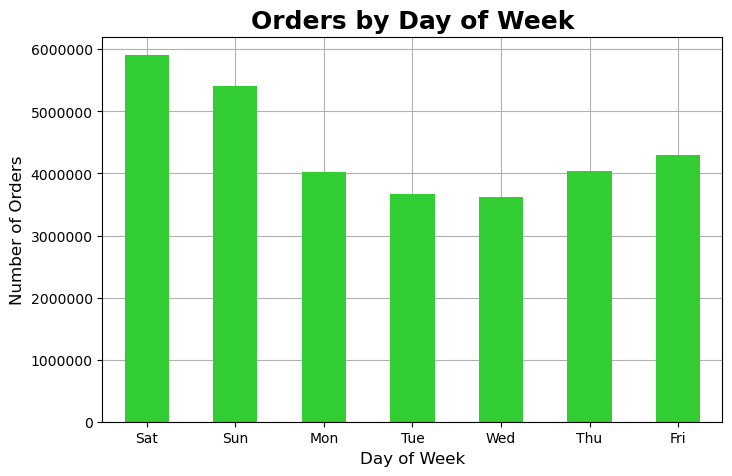

In [15]:
#create a figure
days_bar_fig, ax = plt.subplots(figsize = (8, 5))

#create a bar chart in there
days_bar = day_values.plot.bar(color = 'limegreen', ax = ax)
#with a grid
ax.set_axisbelow(True)
ax.grid()
#rotate xticks
plt.xticks(rotation = 0)
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)
#Add Labels and Title

ax.set_xlabel('Day of Week', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Orders by Day of Week', fontsize = 18, fontweight = 'bold')



In [16]:
# export bar
days_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 1', 'days_bar.png'))

### Create an hour of day histogram

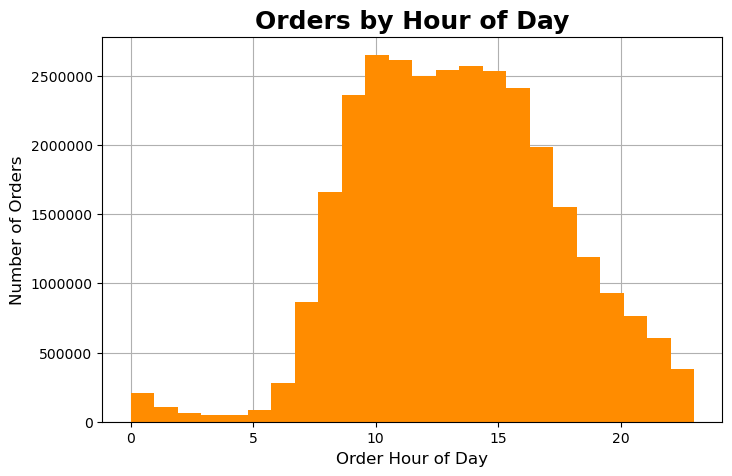

In [17]:
#create a figure
hour_hist_fig, ax = plt.subplots(figsize = (8, 5))
#create a histogram in there 
hour_hist = df['order_hour_of_day'].plot.hist(bins = 24, color = 'darkorange')
#with a grid
plt.grid()
ax.set_axisbelow(True)
#add labels and title
ax.set_xlabel('Order Hour of Day', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Orders by Hour of Day', fontsize = 18, fontweight = 'bold')
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [18]:
# export the histogram

hour_hist_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 1', 'hour_hist.png'))

### Check if the Busiest times of Day are the same across the week

In [19]:
# create a crosstab of days of week and busyness periods
hour_day = pd.crosstab(df['order_day_of_week'], df['busiest_period_of_day'])

In [20]:
#have a look
hour_day

busiest_period_of_day,Average orders,Fewest orders,Most orders
order_day_of_week,,,
0,1710642,199826,3998142
1,1581671,196126,3633889
2,1272154,168323,2584229
3,1193587,157069,2318879
4,1212174,158908,2253912
5,1257016,178597,2598116
6,1323566,174049,2793689


### REMINDER

Most Orders = 9-15

Average Orders = 7-8 & 17-22

Fewest Orders = 23-6

In [21]:
# rename days
hour_day = hour_day.rename(index = day_names)

In [22]:
#rename columns
hour_day = hour_day.rename(columns = {
    'Average orders' : 'Average 7-8 & 17-22',
    'Fewest orders' : 'Fewest 23-6',
    'Most orders' : 'Most 9-15'
})

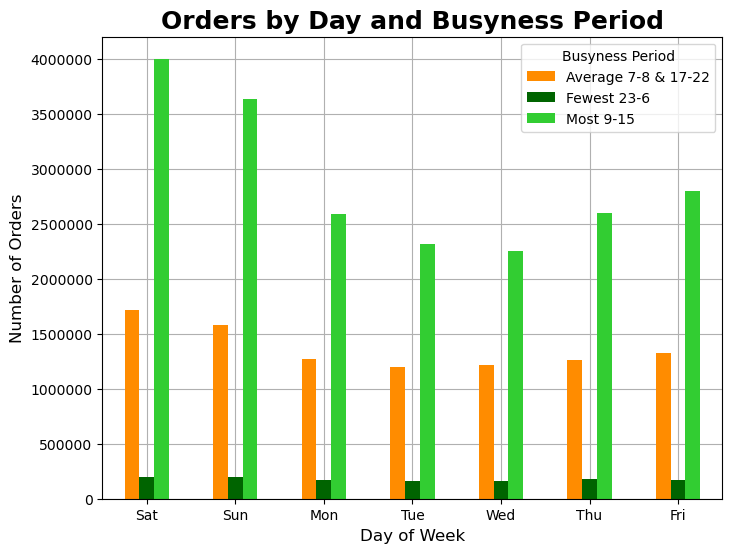

In [23]:
#create a figure
days_busyness_bar_fig, ax = plt.subplots(figsize = (8, 6))
#create a bar chart in there
days_busyness_bar = hour_day.plot.bar(color = ['darkorange', 'darkgreen', 'limegreen'], ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate x marks
plt.xticks(rotation = 0)
#add labels and title
ax.set_xlabel('Day of Week', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Orders by Day and Busyness Period', fontsize = 18, fontweight = 'bold')
ax.legend(title='Busyness Period')
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [24]:
days_busyness_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 1', 'day_busyness_bar.png'))

## 4.0 Question 2 They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.


#### Sampling Data

In [25]:
#set the seed
np.random.seed(4)

In [26]:
# create a list of boolean values for each row of df id: do they belong to the 0.7 or the 0.3
dev = np.random.rand(len(df)) <=0.7

In [27]:
#take a look
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
len(df)

30964564

In [29]:
len(dev)

30964564

In [30]:
#store 70% of df in big
big = df[dev]

In [31]:
# store 30% of df in small
small = df[~dev]

In [32]:
#check the size
print('big shape:', big.shape)
print('small shape:', small.shape)
print('df shape:', df.shape)

big shape: (21676096, 33)
small shape: (9288468, 33)
df shape: (30964564, 33)


In [33]:
21676096/30964564


0.7000291042367011

In [34]:
9288468/30964564


0.299970895763299

## Create a line chart of prices by day of week. 

In [35]:
#create a subset of 'order_day_or_week' and 'prices'
day_prices = small[['order_day_of_week', 'prices']]

Text(0.5, 1.0, 'Average Item Price by Day')

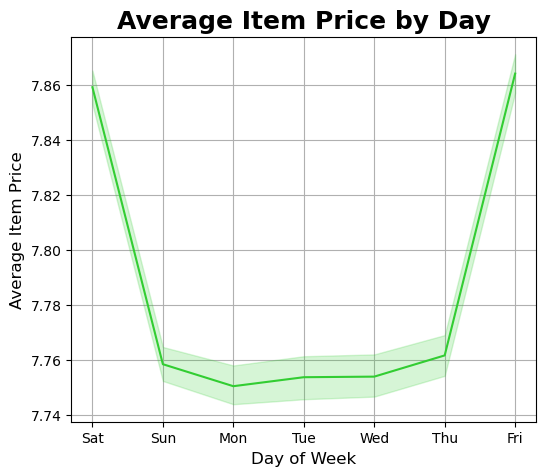

In [36]:
#create a figure
day_price_line_fig, ax = plt.subplots(figsize = (6,5))
#create a line in there
day_price_line = sns.lineplot(data = day_prices, x = 'order_day_of_week', y = 'prices', color = 'limegreen', ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#add labels and title
ax.set_xticks(range(7))
ax.set_xticklabels(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
ax.set_xlabel('Day of Week', fontsize = 12)
ax.set_ylabel('Average Item Price', fontsize = 12)
ax.set_title('Average Item Price by Day', fontsize = 18, fontweight = 'bold')


In [37]:
day_price_line_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 2', 'day_price_line.png'))

### create an hour price line

In [38]:
# create a subset of small with only 'order_hour_of_day' and 'prices'
hour_price = small[['order_hour_of_day', 'prices']]

In [39]:
#check it out
print('hour_price shape:', hour_price.shape)
hour_price.head(10)

hour_price shape: (9288468, 2)


,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,14,13.4
12,8,13.4
13,9,9.0
19,12,4.0
21,15,4.0
22,11,4.0


Text(0.5, 1.0, 'Average Item Price by Time of Day')

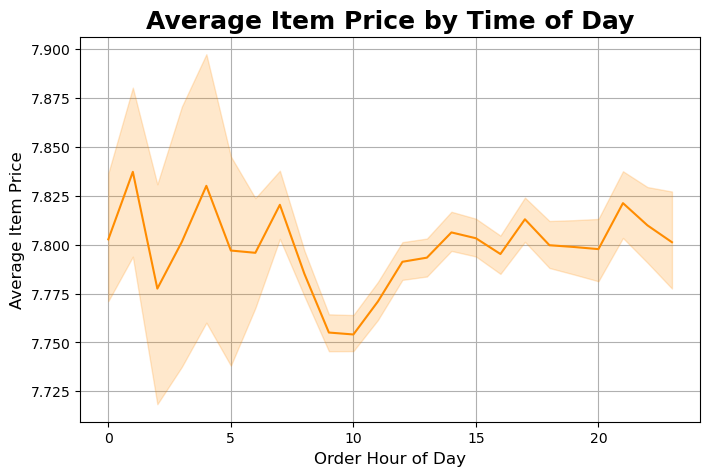

In [40]:
#create a figure
hour_price_line_fig, ax = plt.subplots(figsize = (8, 5))
#create a line in there
hour_price_line = sns.lineplot(data = hour_price, x = 'order_hour_of_day', y = 'prices', color = 'darkorange')
#with a grid
plt.grid()
ax.set_axisbelow(True)
#add labels and title
ax.set_xlabel('Order Hour of Day', fontsize = 12)
ax.set_ylabel('Average Item Price', fontsize = 12)
ax.set_title('Average Item Price by Time of Day', fontsize = 18, fontweight = 'bold')

In [41]:
hour_price_line_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 2', 'hour_price_line.png'))

## 5.0 Question 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct thier efforts. 


### Create a bar of the groupings

In [42]:
#check the groupings we've made
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

## Question 3

Text(0.5, 1.0, 'Number of Orders by Price Category')

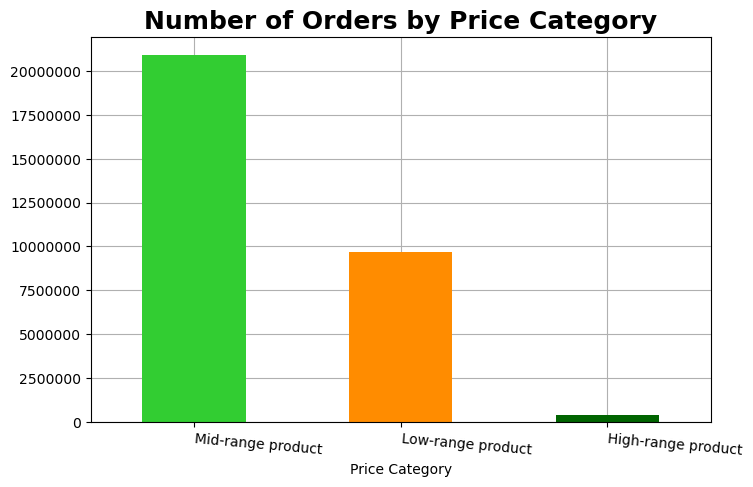

In [76]:
# create a figure
price_range_bar_fig, ax = plt.subplots(figsize = (8, 5))
#create a bar chart in there
price_range_bar = df['price_range_loc'].value_counts().plot.bar(color = ['limegreen', 'darkorange', 'darkgreen'], ax = ax)
# with a grid
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate xticks
plt.xticks(rotation = -5, ha = 'left')
# remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)
# add labels and title
ax.set_xlabel('Price Category')
ax.set_title("Number of Orders by Price Category", fontsize = 18, fontweight = 'bold')


In [77]:
price_range_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 3', 'price_range_bar.png'), transparent = True, bbox_inches = 'tight')

In [50]:
# create a crosstab of order_hour_of_day and price_range_loc
price_range_hour = pd.crosstab(small['order_hour_of_day'], small['price_range_loc'])

In [58]:
price_range_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,798,19340,41860
1,412,10114,22276
2,271,6201,13109
3,161,4599,9938
4,197,4751,10099
5,298,7876,17163
6,1040,26191,56814
7,3327,80375,175363
8,6271,155160,334932


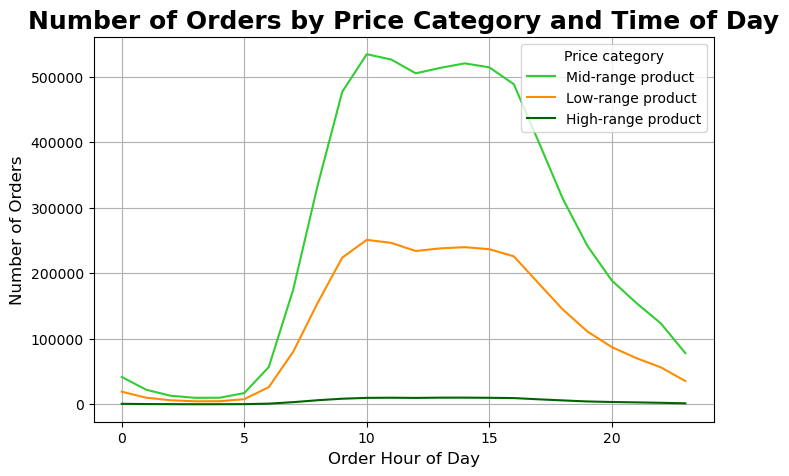

In [62]:
#create a figure
price_range_hour_line_fig, ax = plt.subplots(figsize = (8, 5))
#create a line in there
sns.lineplot(data = price_range_hour, x = price_range_hour.index, y = 'Mid-range product', label = 'Mid-range product', color = 'limegreen', ax = ax)
sns.lineplot(data = price_range_hour, x = price_range_hour.index, y = 'Low-range product', label = 'Low-range product', color = 'darkorange', ax = ax)
sns.lineplot(data = price_range_hour, x = price_range_hour.index, y = 'High-range product', label = 'High-range product', color = 'darkgreen', ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#add labels and title
ax.set_xlabel('Order Hour of Day', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Number of Orders by Price Category and Time of Day', fontsize = 18, fontweight = 'bold')
ax.legend(title = 'Price category', loc = 'upper right')


In [63]:
price_range_hour_line_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 3', 'price_range_hour_line.png'))

## 6.0 Question 4

Text(0.5, 1.0, 'Orders by Department')

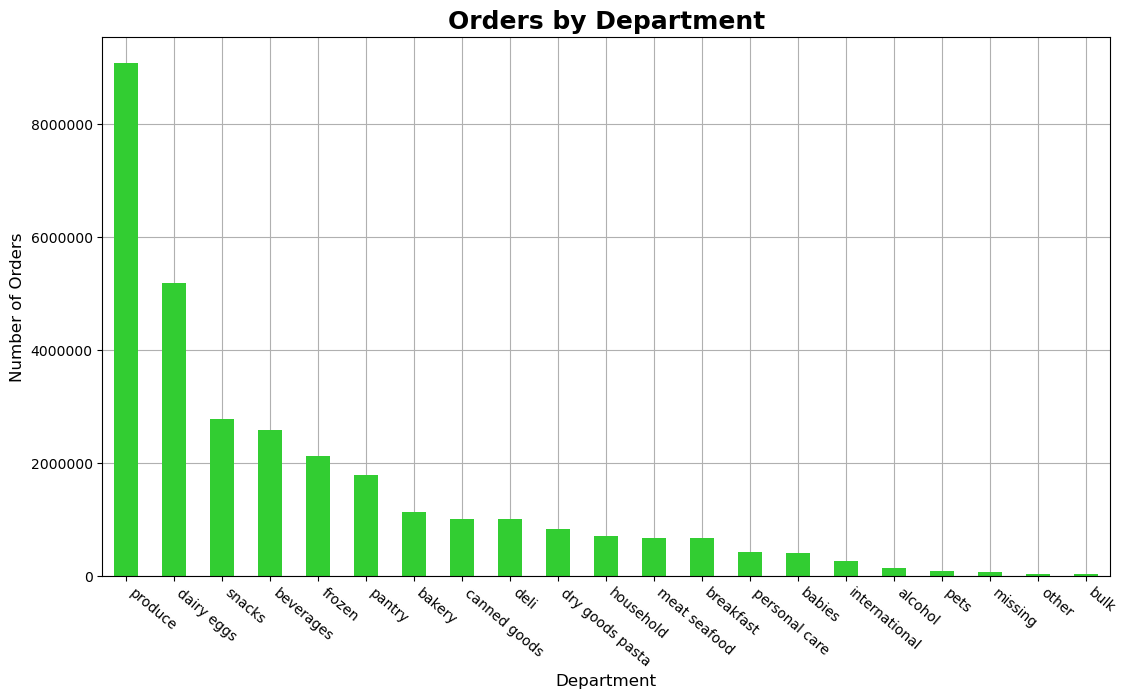

In [64]:
#create a figure
dept_bar_fig, ax = plt.subplots(figsize = (13, 7))
#create a bar chart in there
dept_bar = df['department'].value_counts().plot.bar(color = 'limegreen', ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate xticks
plt.xticks(rotation = -40, ha = 'left')
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)
#Add Labels and Title
ax.set_xlabel('Department', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Orders by Department', fontsize = 18, fontweight = 'bold')

In [66]:
#export dept_bar
dept_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 4', 'dept_bar.png'), bbox_inches = 'tight')

In [68]:
df['department'].value_counts(dropna = False).to_clipboard()

## 7.0 Question 5a

Text(0.5, 1.0, 'Loyalty Representation')

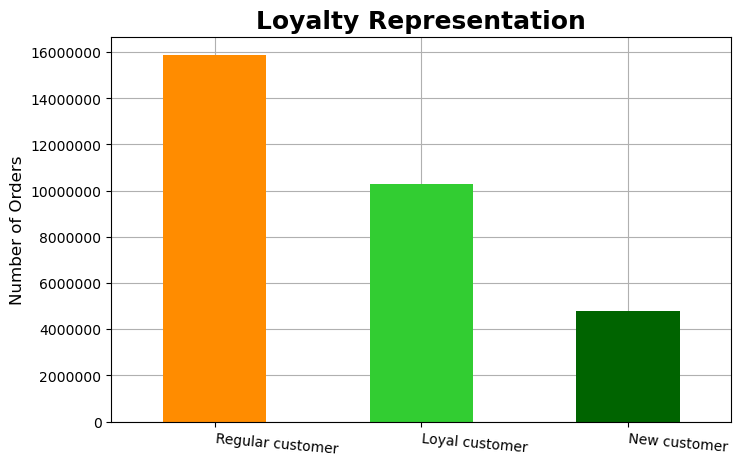

In [47]:
#create a figure
loyalty_bar_fig, ax = plt.subplots(figsize = (8, 5))
#create a bar chart in there
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['darkorange', 'limegreen', 'darkgreen'], ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate xticks
plt.xticks(rotation = -5, ha = 'left')
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)
#Add Labels and Title
ax.set_xlabel('', fontsize = 12)
ax.set_ylabel('Number of Orders', fontsize = 12)
ax.set_title('Loyalty Representation', fontsize = 18, fontweight = 'bold')

In [71]:
df.groupby('loyalty_flag').agg({'prices' : ['min', 'max', 'mean']}).to_clipboard()

In [48]:
#export loyalty bar
loyalty_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'loyalty_bar.png'), transparent = True, bbox_inches = 'tight')

In [72]:
# Make a crosstab of Loyalty_flag and department
loyalty_department = pd.crosstab(df['department'], df['loyalty_flag'])

In [73]:
# send to excel
loyalty_department.to_clipboard()

In [74]:
#create a crosstab of department and region
region_department = pd.crosstab(df['department'], df['region'])

In [75]:
#send it to excel
region_department.to_clipboard()

## 8.0 Export data

In [49]:
#export df
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_dataframe.pkl'))